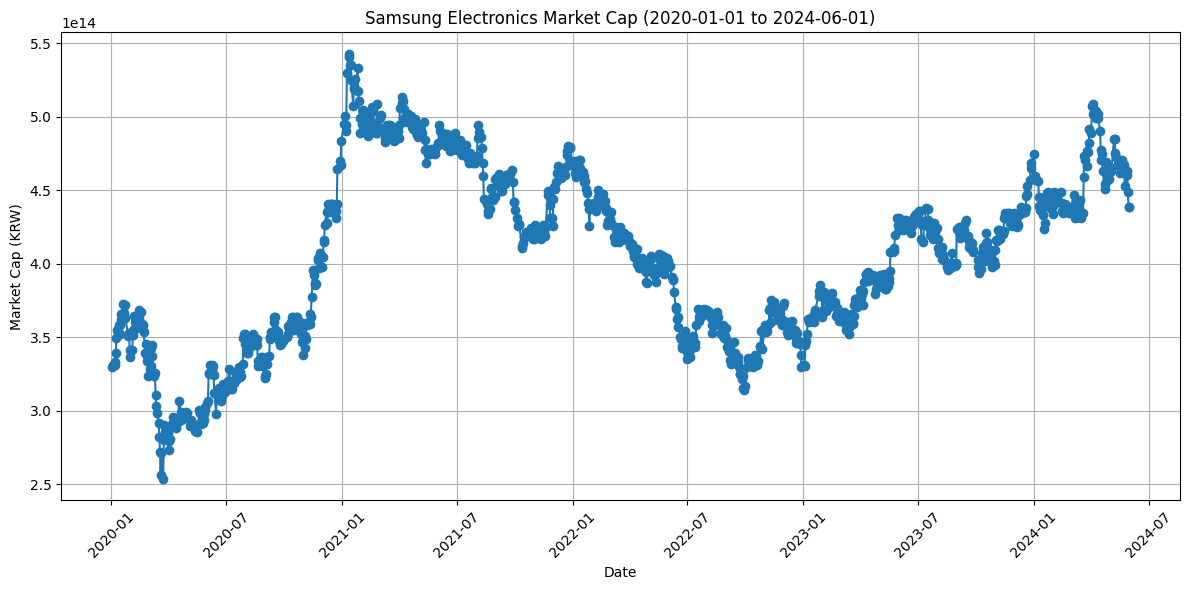

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def get_stock_price_data(stock_code, start_date, end_date):
    headers = {"User-Agent": "Mozilla/5.0"}
    url = f"https://finance.naver.com/item/sise_day.naver?code={stock_code}"
    
    data = []
    page = 1
    while True:
        page_url = f"{url}&page={page}"
        response = requests.get(page_url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        table = soup.find("table", {"class": "type2"})
        rows = table.find_all("tr")[1:]
        
        all_data_retrieved = False
        for row in rows:
            cols = row.find_all("td")
            if len(cols) < 7:
                continue
            
            date = cols[0].text.strip()
            if date:
                date = datetime.strptime(date, "%Y.%m.%d")
                if date < start_date:
                    all_data_retrieved = True
                    break
                
                if date <= end_date:
                    price = int(cols[1].text.strip().replace(",", ""))
                    data.append((date, price))
        
        if all_data_retrieved or not rows:
            break
        
        page += 1

    df = pd.DataFrame(data, columns=["Date", "Price"])
    df = df.sort_values("Date").reset_index(drop=True)
    return df

start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 6, 1)
stock_code = "005930"  # 삼성전자의 종목코드

# 삼성전자의 주가 데이터 가져오기
df = get_stock_price_data(stock_code, start_date, end_date)

# 발행 주식 수는 약 5966.77 백만주 (2024년 기준)
outstanding_shares = 

# 시가 총액 계산
df["Market Cap"] = df["Price"] * outstanding_shares

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Market Cap"], marker='o', linestyle='-')
plt.title("Samsung Electronics Market Cap (2020-01-01 to 2024-06-01)")
plt.xlabel("Date")
plt.ylabel("Market Cap (KRW)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
